# Credit Risk Modelling (LGD,EAD) and ECL Calculation

In [143]:
import numpy as np
import pandas as pd

In [144]:
loan_data_preprocessed_backup=pd.read_csv(r"C:\Users\satyaki basak\Downloads\loan_data_2007_2014_preprocessed.csv")

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_24952\1506362727.py:1: DtypeWarning: Columns (21,49) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_preprocessed_backup=pd.read_csv(r"C:\Users\satyaki basak\Downloads\loan_data_2007_2014_preprocessed.csv")


In [145]:
loan_data_preprocessed=loan_data_preprocessed_backup.copy()

In [146]:
loan_data_preprocessed.isnull().sum()

Unnamed: 0.1             0
Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
                        ..
addr_state:WV            0
addr_state:WY            0
initial_list_status:f    0
initial_list_status:w    0
good_bad                 0
Length: 209, dtype: int64

In [147]:
loan_data_preprocessed.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'member_id', 'loan_amnt',
       'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       ...
       'addr_state:UT', 'addr_state:VA', 'addr_state:VT', 'addr_state:WA',
       'addr_state:WI', 'addr_state:WV', 'addr_state:WY',
       'initial_list_status:f', 'initial_list_status:w', 'good_bad'],
      dtype='object', length=209)

In [148]:
loan_data_preprocessed.head()

,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad
0,0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,...,0,0,0,0,0,0,0,1,0,1
1,1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,...,0,0,0,0,0,0,0,1,0,0
2,2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,...,0,0,0,0,0,0,0,1,0,1
3,3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,...,0,0,0,0,0,0,0,1,0,1
4,4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,...,0,0,0,0,0,0,0,1,0,1


#### Independent Varaibles

In [149]:
loan_data_preprocessed['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [150]:
loan_data_defaults=loan_data_preprocessed[loan_data_preprocessed['loan_status'].isin(['Charged Off','Does not meet the credit policy. Status:Charged Off'])]

In [151]:
loan_data_defaults.shape

(43236, 209)

In [152]:
loan_data_defaults['mths_since_last_delinq'].fillna(0,inplace=True)

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_24952\430155531.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data_defaults['mths_since_last_delinq'].fillna(0,inplace=True)
C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_24952\430155531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mths_since_last_d

In [153]:
loan_data_defaults['mths_since_last_record'].fillna(0,inplace=True)

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_24952\2793952450.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data_defaults['mths_since_last_record'].fillna(0,inplace=True)
C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_24952\2793952450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mths_since_last

#### Dependent Variables

In [154]:
loan_data_defaults['Recovery rate']= loan_data_defaults['recoveries']/loan_data_defaults['funded_amnt']

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_24952\2838917450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['Recovery rate']= loan_data_defaults['recoveries']/loan_data_defaults['funded_amnt']


In [155]:
loan_data_defaults['Recovery rate'].describe()

count    43236.000000
mean         0.060820
std          0.089770
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.220774
Name: Recovery rate, dtype: float64

In [156]:
loan_data_defaults['Recovery rate']=np.where(loan_data_defaults['Recovery rate']>1,1,loan_data_defaults['Recovery rate'])
loan_data_defaults['Recovery rate']=np.where(loan_data_defaults['Recovery rate']<0,0,loan_data_defaults['Recovery rate'])

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_24952\970359394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['Recovery rate']=np.where(loan_data_defaults['Recovery rate']>1,1,loan_data_defaults['Recovery rate'])
C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_24952\970359394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['Recovery rate']=np.where(loan_data_defaults['Recovery rate']<0,0,loan_data_defaults['Recovery rate'])


In [157]:
loan_data_defaults['Recovery rate'].describe()

count    43236.000000
mean         0.060770
std          0.089202
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.000000
Name: Recovery rate, dtype: float64

In [158]:
loan_data_defaults['CCF']=(loan_data_defaults['funded_amnt']-loan_data_defaults['total_rec_prncp'])/loan_data_defaults['funded_amnt']

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_24952\918281197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['CCF']=(loan_data_defaults['funded_amnt']-loan_data_defaults['total_rec_prncp'])/loan_data_defaults['funded_amnt']


In [159]:
loan_data_defaults['CCF'].describe()

count    43236.000000
mean         0.735952
std          0.200742
min          0.000438
25%          0.632088
50%          0.789908
75%          0.888543
max          1.000000
Name: CCF, dtype: float64

loan_data_defaults.to_csv('loan_data_defaults.csv')

#### Explore dependent variables

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(array([2.1023e+04, 1.8370e+03, 3.8730e+03, 1.3940e+03, 2.1330e+03,
        3.3440e+03, 4.7650e+03, 1.7130e+03, 1.1790e+03, 4.0600e+02,
        3.4100e+02, 2.7400e+02, 1.1700e+02, 9.3000e+01, 8.1000e+01,
        7.3000e+01, 5.4000e+01, 7.2000e+01, 5.7000e+01, 3.0000e+01,
        4.7000e+01, 2.7000e+01, 1.7000e+01, 1.5000e+01, 2.0000e+01,
        2.3000e+01, 1.7000e+01, 7.0000e+00, 1.1000e+01, 7.0000e+00,
        8.0000e+00, 7.0000e+00, 7.0000e+00, 8.0000e+00, 7.0000e+00,
        1.0000e+01, 6.0000e+00, 1.1000e+01, 9.0000e+00, 9.0000e+00,
        6.0000e+00, 6.0000e+00, 6.0000e+00, 3.0000e+00, 9.0000e+00,
        9.0000e+00, 1.5000e+01, 8.0000e+00, 9.0000e+00, 3.3000e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

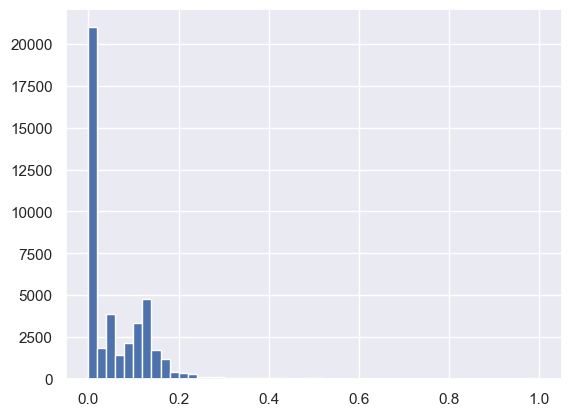

In [161]:
plt.hist(loan_data_defaults['Recovery rate'],bins=50)

(array([   3.,   17.,   16.,   44.,   16.,   13.,   71.,   26.,    7.,
          63.,   67.,   17.,   60.,   90.,   23.,   55.,   82.,   42.,
          47.,  123.,   82.,   70.,  122.,   86.,   89.,  110.,  117.,
         111.,  122.,  120.,  135.,  141.,  154.,  146.,  160.,  175.,
         152.,  187.,  202.,  174.,  204.,  208.,  210.,  211.,  241.,
         264.,  281.,  224.,  308.,  267.,  287.,  296.,  340.,  274.,
         365.,  370.,  392.,  364.,  393.,  419.,  411.,  429.,  445.,
         497.,  481.,  478.,  569.,  568.,  599.,  618.,  727.,  691.,
         626.,  805.,  804.,  776.,  881.,  851.,  916.,  934.,  925.,
        1078.,  933., 1218., 1041., 1082., 1336., 1040., 1374., 1073.,
        1406., 1287.,  952., 1414.,  795., 1320.,  578.,  949.,  343.,
         531.]),
 array([4.3800000e-04, 1.0433620e-02, 2.0429240e-02, 3.0424860e-02,
        4.0420480e-02, 5.0416100e-02, 6.0411720e-02, 7.0407340e-02,
        8.0402960e-02, 9.0398580e-02, 1.0039420e-01, 1.1038982e-01

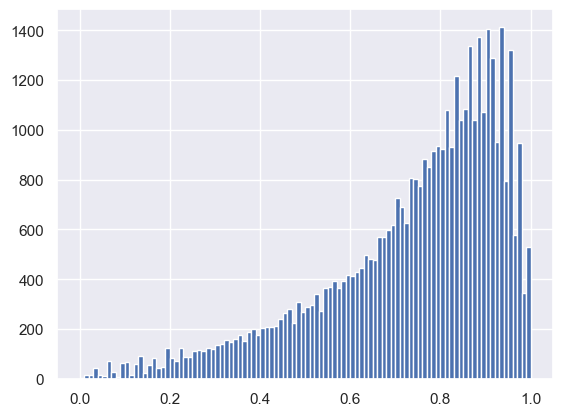

In [162]:
plt.hist(loan_data_defaults['CCF'],bins=100)

In [163]:
loan_data_defaults['recovery_rate_0_1']=np.where(loan_data_defaults['Recovery rate']== 0,0,1)

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_24952\1452538193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate_0_1']=np.where(loan_data_defaults['Recovery rate']== 0,0,1)


In [164]:
loan_data_defaults['recovery_rate_0_1']

1         1
8         1
9         1
12        1
14        1
         ..
466254    0
466256    0
466276    1
466277    0
466281    0
Name: recovery_rate_0_1, Length: 43236, dtype: int32

### LGD Model

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
lgd_input_stage_1_train,lgd_input_stage_1_test,lgd_target_stage_1_train,lgd_target_stage_1_test=train_test_split(loan_data_defaults.drop(['good_bad','Recovery rate','recovery_rate_0_1','CCF'],axis=1),loan_data_defaults['recovery_rate_0_1'],test_size=0.2,random_state=42)

In [167]:
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']

In [168]:
features_reference_cat = ['grade:G',
'home_ownership:RENT',
'verification_status:Verified',
'purpose:credit_card',
'initial_list_status:f']

In [169]:
lgd_input_stage_1_train = lgd_input_stage_1_train[features_all]

In [170]:
lgd_input_stage_1_train = lgd_input_stage_1_train.drop(features_reference_cat, axis = 1)

In [171]:
lgd_input_stage_1_train.isnull().sum()

grade:A                                0
grade:B                                0
grade:C                                0
grade:D                                0
grade:E                                0
grade:F                                0
home_ownership:MORTGAGE                0
home_ownership:NONE                    0
home_ownership:OTHER                   0
home_ownership:OWN                     0
verification_status:Not Verified       0
verification_status:Source Verified    0
purpose:car                            0
purpose:debt_consolidation             0
purpose:educational                    0
purpose:home_improvement               0
purpose:house                          0
purpose:major_purchase                 0
purpose:medical                        0
purpose:moving                         0
purpose:other                          0
purpose:renewable_energy               0
purpose:small_business                 0
purpose:vacation                       0
purpose:wedding 

In [172]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [173]:
reg_lgd_st_1 = LogisticRegression_with_p_values()
reg_lgd_st_1.fit(lgd_input_stage_1_train, lgd_target_stage_1_train)

C:\Users\satyaki basak\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [174]:
feature_name = lgd_input_stage_1_train.columns.values

In [175]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_1.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.055926e-04,NaN
1,grade:A,-1.281629e-05,9.998778e-01
2,grade:B,-7.545864e-05,9.991120e-01
3,grade:C,-1.436978e-04,9.982517e-01
4,grade:D,1.930150e-05,9.997747e-01
5,grade:E,1.528825e-05,9.998382e-01
6,grade:F,7.897300e-05,9.992730e-01
7,home_ownership:MORTGAGE,-3.761709e-05,9.988115e-01
8,home_ownership:NONE,9.588892e-07,9.999990e-01
9,home_ownership:OTHER,5.318494e-07,9.999989e-01


#### Testing The model

In [176]:
lgd_input_stage_1_test=lgd_input_stage_1_test[features_all]

In [177]:
lgd_input_stage_1_test=lgd_input_stage_1_test.drop(features_reference_cat,axis=1)

In [178]:
y_hat_test_lgd_stage_1=reg_lgd_st_1.model.predict(lgd_input_stage_1_test)

In [179]:
y_hat_test_lgd_stage_1

array([1, 1, 0, ..., 1, 1, 1])

In [180]:
y_hat_test_proba_lgd_stage_1=reg_lgd_st_1.model.predict_proba(lgd_input_stage_1_test)

In [181]:
y_hat_test_proba_lgd_stage_1

array([[0.41197543, 0.58802457],
       [0.39217986, 0.60782014],
       [0.52397499, 0.47602501],
       ...,
       [0.4806249 , 0.5193751 ],
       [0.42236574, 0.57763426],
       [0.47090538, 0.52909462]])

In [182]:
y_hat_test_proba_lgd_stage_1=y_hat_test_proba_lgd_stage_1[:][: ,1]

In [183]:
y_hat_test_proba_lgd_stage_1

array([0.58802457, 0.60782014, 0.47602501, ..., 0.5193751 , 0.57763426,
       0.52909462])

In [184]:
lgd_target_stage_1_test_temp=lgd_target_stage_1_test

In [185]:
lgd_target_stage_1_test_temp.reset_index(drop=True,inplace=True)

In [186]:
lgd_target_stage_1_test_temp.shape

(8648,)

In [187]:
y_hat_test_proba_lgd_stage_1.shape

(8648,)

In [188]:
df_actual_predicted_probs=pd.concat([lgd_target_stage_1_test_temp,pd.DataFrame(y_hat_test_proba_lgd_stage_1)],axis=1)

In [189]:
df_actual_predicted_probs.columns=['lgd_target_stage_1_test','y_hat_test_proba_lgd_stage_1']

In [190]:
df_actual_predicted_probs

,lgd_target_stage_1_test,y_hat_test_proba_lgd_stage_1
0,1,0.588025
1,1,0.607820
2,0,0.476025
3,1,0.555343
4,0,0.402169
...,...,...
8643,1,0.569650
8644,0,0.631633
8645,1,0.519375
8646,1,0.577634


In [191]:
df_actual_predicted_probs.index=lgd_input_stage_1_test.index

In [192]:
df_actual_predicted_probs.head()

,lgd_target_stage_1_test,y_hat_test_proba_lgd_stage_1
178928,1,0.588025
69814,1,0.607820
101396,0,0.476025
463268,1,0.555343
253729,0,0.402169


In [193]:
tr=0.5
df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1']=np.where(df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1']>tr,1,0)

In [194]:
pd.crosstab(df_actual_predicted_probs['lgd_target_stage_1_test'],df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'],rownames=['Actual'],colnames=['Predicted'])

Predicted,0,1
Actual,,
0,987,2775
1,656,4230


In [195]:
pd.crosstab(df_actual_predicted_probs['lgd_target_stage_1_test'],df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'],
            rownames=['Actual'],colnames=['Predicted'])/df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.114130,0.320883
1,0.075856,0.489130


In [196]:
(pd.crosstab(df_actual_predicted_probs['lgd_target_stage_1_test'],df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'],
            rownames=['Actual'],colnames=['Predicted'])/df_actual_predicted_probs.shape[0]).iloc[0,0]+(pd.crosstab(df_actual_predicted_probs['lgd_target_stage_1_test'],df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'],
            rownames=['Actual'],colnames=['Predicted'])/df_actual_predicted_probs.shape[0]).iloc[1,1]

0.6032608695652174

In [197]:
import pickle

pickle.dump(reg_lgd_st_1,open('lgd_model_stage_1.sav','wb'))

#### Stage 2 - Linear Regression

In [198]:
lgd_stage_2_data=loan_data_defaults[loan_data_defaults['recovery_rate_0_1']==1]

In [199]:
lgd_input_stage_2_train,lgd_input_stage_2_test,lgd_target_stage_2_train,lgd_target_stage_2_test=train_test_split(lgd_stage_2_data.drop(['good_bad','Recovery rate','recovery_rate_0_1','CCF'],axis=1),lgd_stage_2_data['Recovery rate'],test_size=0.2,random_state=42)

In [200]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

In [204]:
from sklearn.linear_model import LinearRegression



In [201]:
lgd_input_stage_2_train = lgd_input_stage_2_train[features_all]

In [202]:
lgd_input_stage_2_train = lgd_input_stage_2_train.drop(features_reference_cat, axis = 1)

In [205]:
reg_lgd_st_2 = LinearRegression()
reg_lgd_st_2.fit(lgd_input_stage_2_train,lgd_target_stage_2_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [206]:
feature_name=lgd_input_stage_2_train.columns.values

In [208]:

summary_table = pd.DataFrame({
    "Feature name": feature_name,
    "Coefficients": reg_lgd_st_2.coef_.flatten()  # flatten in case it's 2D
})

# Shift index to start from 1
summary_table.index = summary_table.index + 1

# Add intercept row at the top
intercept_row = pd.DataFrame({
    "Feature name": ["Intercept"],
    "Coefficients": [reg_lgd_st_2.intercept_]
})
summary_table = pd.concat([intercept_row, summary_table]).reset_index(drop=True)

summary_table


,Feature name,Coefficients
0,Intercept,2.406858e-01
1,grade:A,-6.826892e-02
2,grade:B,-5.083556e-02
3,grade:C,-3.748066e-02
4,grade:D,-2.717310e-02
5,grade:E,-1.315941e-02
6,grade:F,-5.260168e-03
7,home_ownership:MORTGAGE,2.832212e-03
8,home_ownership:NONE,1.459035e-01
9,home_ownership:OTHER,-9.475922e-03


In [212]:
lgd_input_stage_2_test=lgd_input_stage_2_test[features_all]

In [214]:
lgd_input_stage_2_test=lgd_input_stage_2_test.drop(features_reference_cat,axis=1)

In [215]:
lgd_input_stage_2_test.columns.values

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'initial_list_status:w', 'term_int', 'emp_length_int',
       'mths_since_issue_d', 'mths_since_earliest_cr_line', 'funded_amnt',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'total_rev_hi_lim'], dtype=object)

In [216]:
y_hat_test_lgd_stage_2=reg_lgd_st_2.predict(lgd_input_stage_2_test)

In [217]:
lgd_target_stage_2_test_temp=lgd_target_stage_2_test

In [218]:
lgd_target_stage_2_test_temp=lgd_target_stage_2_test_temp.reset_index(drop=True)

In [219]:
pd.concat([lgd_target_stage_2_test_temp,pd.DataFrame(y_hat_test_lgd_stage_2)],axis=1).corr()

,Recovery rate,0
Recovery rate,1.000000,0.307996
0,0.307996,1.000000


C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_24952\2689198740.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lgd_target_stage_2_test-y_hat_test_lgd_stage_2)
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Recovery rate', ylabel='Density'>

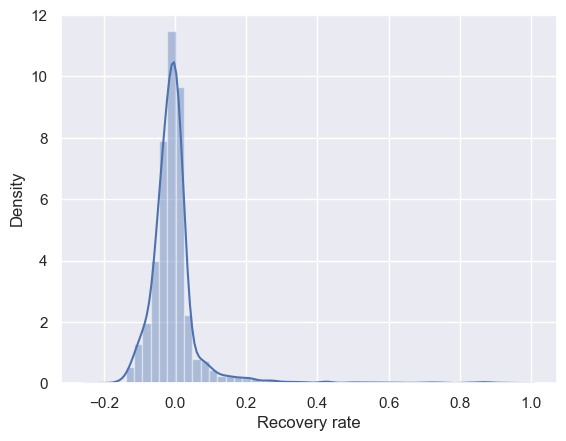

In [220]:
sns.distplot(lgd_target_stage_2_test-y_hat_test_lgd_stage_2)

In [221]:
pickle.dump(reg_lgd_st_2,open('lgd_model_stage_2.sav','wb'))

#### Combining Stage 1 and Stage 2

In [222]:
y_hat_test_lgd_stage_2_all=reg_lgd_st_2.predict(lgd_input_stage_1_test)

In [223]:
y_hat_test_lgd_stage_2_all

array([0.1193906 , 0.09605635, 0.13367631, ..., 0.12078611, 0.11587422,
       0.15667447])

In [224]:
y_hat_test_lgd=y_hat_test_lgd_stage_1*y_hat_test_lgd_stage_2_all

In [225]:
pd.DataFrame(y_hat_test_lgd).describe()

,0
count,8648.000000
mean,0.087560
std,0.049596
min,-0.007634
25%,0.066206
50%,0.101380
75%,0.123543
max,0.236973


In [226]:
y_hat_test_lgd=np.where(y_hat_test_lgd<0 ,0 ,y_hat_test_lgd)
y_hat_test_lgd=np.where(y_hat_test_lgd>1, 1, y_hat_test_lgd)

In [227]:
pd.DataFrame(y_hat_test_lgd).describe()

,0
count,8648.000000
mean,0.087562
std,0.049593
min,0.000000
25%,0.066206
50%,0.101380
75%,0.123543
max,0.236973


#### EAD Model

In [229]:
ead_input_train,ead_input_test,ead_target_train,ead_target_test=train_test_split(loan_data_defaults.drop(['good_bad','Recovery rate','recovery_rate_0_1','CCF'],axis=1),loan_data_defaults['CCF'],test_size=0.2,random_state=42)

In [230]:
ead_input_train.columns.values

array(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'member_id', 'loan_amnt',
       'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_join

In [232]:
ead_input_train=ead_input_train[features_all]

In [233]:
ead_input_train=ead_input_train.drop(features_reference_cat,axis=1)

In [234]:
reg_ead=LinearRegression()
reg_ead.fit(ead_input_train,ead_target_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [235]:
feature_name=ead_input_train.columns.values

In [236]:
summary_table = pd.DataFrame({
    "Feature name": feature_name,
    "Coefficients": reg_ead.coef_.flatten()  # flatten in case it's 2D
})

# Shift index to start from 1
summary_table.index = summary_table.index + 1

# Add intercept row at the top
intercept_row = pd.DataFrame({
    "Feature name": ["Intercept"],
    "Coefficients": [reg_ead.intercept_]
})
summary_table = pd.concat([intercept_row, summary_table]).reset_index(drop=True)

summary_table

,Feature name,Coefficients
0,Intercept,1.109746e+00
1,grade:A,-3.030033e-01
2,grade:B,-2.364277e-01
3,grade:C,-1.720232e-01
4,grade:D,-1.198470e-01
5,grade:E,-6.768713e-02
6,grade:F,-2.045907e-02
7,home_ownership:MORTGAGE,-6.343341e-03
8,home_ownership:NONE,-5.539064e-03
9,home_ownership:OTHER,-2.426052e-03


In [237]:
ead_input_test=ead_input_test[features_all]

In [238]:
ead_input_test=ead_input_test.drop(features_reference_cat,axis=1)

In [239]:
y_hat_test_ead=reg_ead.predict(ead_input_test)

In [240]:
ead_target_test_temp=ead_target_test

In [241]:
ead_target_test_temp=ead_target_test_temp.reset_index(drop=True)

In [242]:
pd.concat([ead_target_test_temp, pd.DataFrame(y_hat_test_ead)],axis=1).corr()

,CCF,0
CCF,1.000000,0.530654
0,0.530654,1.000000


C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_24952\1633722157.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ead_target_test-y_hat_test_ead)
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CCF', ylabel='Density'>

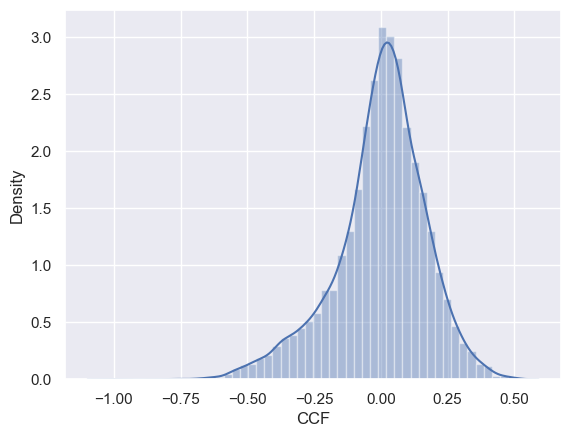

In [243]:
sns.distplot(ead_target_test-y_hat_test_ead)

In [244]:
pd.DataFrame(y_hat_test_ead).describe()

,0
count,8648.000000
mean,0.736013
std,0.105194
min,0.384774
25%,0.661553
50%,0.731750
75%,0.810625
max,1.161088


In [245]:
y_hat_test_ead=np.where(y_hat_test_ead<0, 0,y_hat_test_ead)
y_hat_test_ead=np.where(y_hat_test_ead>1, 1,y_hat_test_ead)

In [246]:
pd.DataFrame(y_hat_test_ead).describe()

,0
count,8648.000000
mean,0.735992
std,0.105127
min,0.384774
25%,0.661553
50%,0.731750
75%,0.810625
max,1.000000


### Expected Credit Loss Calculation

In [247]:
loan_data_preprocessed.head()

,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad
0,0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,...,0,0,0,0,0,0,0,1,0,1
1,1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,...,0,0,0,0,0,0,0,1,0,0
2,2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,...,0,0,0,0,0,0,0,1,0,1
3,3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,...,0,0,0,0,0,0,0,1,0,1
4,4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,...,0,0,0,0,0,0,0,1,0,1


In [256]:
loan_data_preprocessed['mths_since_last_delinq'].fillna(0,inplace=True)

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_24952\3137839301.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data_preprocessed['mths_since_last_delinq'].fillna(0,inplace=True)


In [257]:
loan_data_preprocessed['mths_since_last_record'].fillna(0,inplace=True)

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_24952\3589622986.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data_preprocessed['mths_since_last_record'].fillna(0,inplace=True)


In [258]:
loan_data_preprocessed_lgd_ead=loan_data_preprocessed[features_all]

In [259]:
loan_data_preprocessed_lgd_ead=loan_data_preprocessed_lgd_ead.drop(features_reference_cat,axis=1)

In [260]:
loan_data_preprocessed['recovery_rate_st_1']=reg_lgd_st_1.model.predict(loan_data_preprocessed_lgd_ead)

In [261]:
loan_data_preprocessed['recovery_rate_st_2']=reg_lgd_st_2.predict(loan_data_preprocessed_lgd_ead)

In [262]:
loan_data_preprocessed['recovery_rate']=loan_data_preprocessed['recovery_rate_st_1']*loan_data_preprocessed['recovery_rate_st_2']

In [263]:
loan_data_preprocessed['recovery_rate']=np.where(loan_data_preprocessed['recovery_rate']<0,0,loan_data_preprocessed['recovery_rate'])
loan_data_preprocessed['recovery_rate']=np.where(loan_data_preprocessed['recovery_rate']>1,1,loan_data_preprocessed['recovery_rate'])

In [264]:
loan_data_preprocessed['LGD']= 1- loan_data_preprocessed['recovery_rate']

In [265]:
loan_data_preprocessed['LGD'].describe()

count    466285.000000
mean          0.919440
std           0.057392
min           0.371789
25%           0.873003
50%           0.898543
75%           1.000000
max           1.000000
Name: LGD, dtype: float64

In [266]:
loan_data_preprocessed['CCF']=reg_ead.predict(loan_data_preprocessed_lgd_ead)

In [267]:
loan_data_preprocessed['CCF']=np.where(loan_data_preprocessed['CCF']<0,0,loan_data_preprocessed['CCF'])
loan_data_preprocessed['CCF']=np.where(loan_data_preprocessed['CCF']>1,1,loan_data_preprocessed['CCF'])

In [268]:
loan_data_preprocessed['EAD']=loan_data_preprocessed['CCF']*loan_data_preprocessed_lgd_ead['funded_amnt']

In [269]:
loan_data_preprocessed['EAD'].describe()

count    466285.000000
mean      10814.846760
std        6935.184562
min         190.347372
25%        5495.101413
50%        9208.479591
75%       14692.844549
max       35000.000000
Name: EAD, dtype: float64

In [270]:
loan_data_preprocessed.head()

,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad,recovery_rate_st_1,recovery_rate_st_2,recovery_rate,LGD,CCF,EAD
0,0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,...,0,1,0,1,1,0.086271,0.086271,0.913729,0.589922,2949.608449
1,1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,...,0,1,0,0,1,0.084518,0.084518,0.915482,0.777773,1944.433378
2,2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,...,0,1,0,1,1,0.080516,0.080516,0.919484,0.658306,1579.934302
3,3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,...,0,1,0,1,1,0.095076,0.095076,0.904924,0.660656,6606.559612
4,4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,...,0,1,0,1,1,0.088547,0.088547,0.911453,0.708211,2124.631667


In [272]:
loan_data_input_train=pd.read_csv('loan_data_inputs_train.csv')

In [273]:
loan_data_input_test=pd.read_csv('loan_data_inputs_test.csv')

In [274]:
loan_data_inputs_pd=pd.concat([loan_data_input_train,loan_data_input_test],axis=0)

In [275]:
loan_data_inputs_pd.shape

(466285, 331)

In [276]:
loan_data_inputs_pd.head()

,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
0,427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,...,1,0,0,1,0,0,0,0,0,0
1,206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,...,0,0,0,1,0,0,0,0,0,0
2,136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,...,0,0,0,1,0,0,0,0,0,0
3,412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,...,0,0,0,1,0,0,0,0,0,0
4,36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,...,0,1,0,1,0,0,0,0,0,0


In [278]:
loan_data_inputs_pd=loan_data_inputs_pd.set_index('Unnamed: 0')

In [279]:
loan_data_inputs_pd.head()

,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,1,0,0,0,0,0,0


In [283]:
features_all_pd = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2',
'emp_length:3',
'emp_length:4-5',
'emp_length:6',
'emp_length:7',
'emp_length:8',
'emp_length:9',
'emp_length:10',
'mnth_since_issue_date:<46',
'mnth_since_issue_date:46-57',
'mnth_since_issue_date:57-62',
'mnth_since_issue_date:62-67',
'mnth_since_issue_date:67-73',
'mnth_since_issue_date:73-78',
'mnth_since_issue_date:78-86',
'mnth_since_issue_date:86-102',
'mnth_since_issue_date:102-111',
'mnth_since_issue_date:>111',
'int_rate_factor:<9.548',
'int_rate_factor:9.548-12.025',
'int_rate_factor:12.025-15.74',
'int_rate_factor:15.74-20.281',
'int_rate_factor:>20.281',
'mnth_since_earliest_cr_line_date:<140',
'mnth_since_earliest_cr_line_date:141-164',
'mnth_since_earliest_cr_line_date:165-247',
'mnth_since_earliest_cr_line_date:248-270',
'mnth_since_earliest_cr_line_date:271-352',
'mnth_since_earliest_cr_line_date:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20k',
'annual_inc:20k-30k',
'annual_inc:30k-40k',
'annual_inc:40k-50k',
'annual_inc:50k-60k',
'annual_inc:60k-70k',
'annual_inc:70k-80k',
'annual_inc:80k-90k',
'annual_inc:90k-100k',
'annual_inc:100k-120k',
'annual_inc:120k-140k',
'annual_inc:>140k',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'initial_list_status:f',
'initial_list_status:w']
                                

In [284]:
ref_categories_pd = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mnth_since_issue_date:>111',
'int_rate_factor:>20.281',
'mnth_since_earliest_cr_line_date:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20k',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [285]:
loan_data_input_pd_temp = loan_data_inputs_pd[features_all_pd]

In [287]:
loan_data_inputs_pd_temp = loan_data_input_pd_temp.drop(ref_categories_pd, axis = 1)

In [288]:
loan_data_input_pd_temp.shape

(466285, 102)

In [289]:
reg_pd = pickle.load(open('pd_model.sav', 'rb'))

In [296]:
reg_pd.predict_proba(loan_data_inputs_pd_temp)[: ][: , 0]

array([0.00407604, 0.00424939, 0.00376025, ..., 0.00438536, 0.00436752,
       0.00353576])

In [297]:
loan_data_inputs_pd['PD']=reg_pd.predict_proba(loan_data_inputs_pd_temp)[: ][: , 0]

In [298]:
loan_data_inputs_pd['PD'].head()

Unnamed: 0
427211    0.004076
206088    0.004249
136020    0.003760
412305    0.059626
36159     0.028472
Name: PD, dtype: float64

In [299]:
loan_data_inputs_pd['PD'].describe()

count    466285.000000
mean          0.018198
std           0.017851
min           0.000434
25%           0.007470
50%           0.015002
75%           0.024493
max           0.752175
Name: PD, dtype: float64

In [300]:
loan_data_preprocessed_new = pd.concat([loan_data_preprocessed, loan_data_inputs_pd], axis = 1)

In [301]:
loan_data_preprocessed_new.shape

(466285, 546)

In [302]:
loan_data_preprocessed_new.head()

,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86,PD
0,0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,...,1,0,1,0,0,0,0,0,0,0.003312
1,1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,...,0,0,1,0,0,0,0,0,0,0.006449
2,2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,...,0,0,1,0,0,0,0,0,0,0.002686
3,3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,...,0,0,1,0,0,0,0,0,0,0.005013
4,4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,...,0,0,1,0,0,0,0,0,0,0.003218


In [303]:
loan_data_preprocessed_new['EL'] = loan_data_preprocessed_new['PD'] * loan_data_preprocessed_new['LGD'] * loan_data_preprocessed_new['EAD']

In [304]:
loan_data_preprocessed_new['EL'].describe()

count    466285.000000
mean        190.940351
std         224.942186
min           0.330598
25%          49.226192
50%         111.384115
75%         251.938896
max       10265.954897
Name: EL, dtype: float64

In [305]:
loan_data_preprocessed_new[['funded_amnt', 'PD', 'LGD', 'EAD', 'EL']].head()

,funded_amnt,funded_amnt,PD,LGD,EAD,EL
0,5000,5000,0.003312,0.913729,2949.608449,8.926722
1,2500,2500,0.006449,0.915482,1944.433378,11.480046
2,2400,2400,0.002686,0.919484,1579.934302,3.901973
3,10000,10000,0.005013,0.904924,6606.559612,29.967481
4,3000,3000,0.003218,0.911453,2124.631667,6.230807


In [306]:
loan_data_preprocessed_new['funded_amnt'].describe()

,funded_amnt,funded_amnt
count,466285.000000,466285.000000
mean,14291.801044,14291.801044
std,8274.371300,8274.371300
min,500.000000,500.000000
25%,8000.000000,8000.000000
50%,12000.000000,12000.000000
75%,20000.000000,20000.000000
max,35000.000000,35000.000000


#### Total Expected Loss on Portfolio

In [307]:
loan_data_preprocessed_new['EL'].sum()

89032621.60184804

In [308]:
loan_data_preprocessed_new['funded_amnt'].sum()

funded_amnt    6664052450
funded_amnt    6664052450
dtype: int64

In [309]:
loan_data_preprocessed_new['EL'].sum() / loan_data_preprocessed_new['funded_amnt'].sum()

funded_amnt    0.01336
funded_amnt    0.01336
dtype: float64